In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./promotion.csv")

## Conhecendo os dados

Antes de iniciarmos a limpeza e o tratamento dos dados, é interessante que conheçamos os dados com os quais trabalharemos. Para isso, o primeiro passo é entender do que trata o dataset.
<br>
<br>
No nosso caso, o dataset traz informações acerca da promoção no ambiente de trabalho. Em outras palavras, são usadas várias métricas (idade, desempenho, premiações) para verificar quais destas métricas influenciam na promoção e como se dá essa influência.
<br>
<br>
Ainda, precisamos entender o significado de cada coluna:
- employee_id: usado para atribuir um identificador único pra cada registro: cada linha deve ter um id diferente
- department: o departamento em que cada pessoa entrevistada trabalha (dado qualitativo)
- region: região em que a pessoa trabalha (dado qualitativo)
- education: corresponde ao nível educacional, pode ser tratado como uma variável ordinal (do nível de menor educação ao de maior educação)
- gender: gênero. Para este dataset em específico, foram considerados apenas masculino e feminino
- recruitment_channel: forma que a pessoa foi contratada pela empresa
- no_of_trainings: número de treinamentos realizados pela pessoa
- previous_year_rating: avaliação do desempenho do(a) trabalhador(a) no ano anterior
- age: idade
- length_of_service: quanto tempo a pessoa está no cargo
- awards_won?: variável binária que indica 0 quando o empregado não foi premiado e 1 quando foi premiado
- avg_training_score: desempenho nos treinamentos
- is_promoted: variável binária que indica 0 quando a pessoa não foi promovida e 1 quando a mesma é promovida

### Observações Iniciais

In [5]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,NaN,Master's & above,f,sourcin,1,147,5.0,8,0,49,Yes
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


Conforme explicamos na primeira aula, o df.head() permite uma observação de algumas linhas iniciais do dataset. Costuma ser bem útil para entender um pouco mais da disposição dos dados, bem como para ter ideias de como trabalhar com as informações disponíveis. Nesse sentido, é interessante para já identificarmos algumas inconsistências iniciais, certo?
<br>
Primeiro, temos esse NaN na primeira linha da coluna *region*, que significa "Not a Number". É a forma que o Pandas representa uma informação que não foi preenchida.
<br>
Ainda nessa primeira linha, vemos que *sourcing* foi escrito incorretamente, a idade está fora do limite esperado e a coluna *is_promoted* apresenta um texto (Yes) ao invés de um valor binário (0 ou 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54812 entries, 0 to 54811
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54812 non-null  int64  
 1   department            54812 non-null  object 
 2   region                54767 non-null  object 
 3   education             52402 non-null  object 
 4   gender                54812 non-null  object 
 5   recruitment_channel   54812 non-null  object 
 6   no_of_trainings       54812 non-null  int64  
 7   age                   54812 non-null  int64  
 8   previous_year_rating  50687 non-null  float64
 9   length_of_service     54812 non-null  int64  
 10  awards_won?           54812 non-null  int64  
 11  avg_training_score    54812 non-null  int64  
 12  is_promoted           54812 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 5.4+ MB


O df.info() fornece as colunas do dataset, o número de valores não-nulos (não-ausentes) em cada coluna e o tipo de coluna
  - int64: coluna com valores inteiros (inclui binários)
  - float64: coluna com valores numéricos, não necessariamente inteiros
  - object: demais colunas (apenas texto, texto e número)

Nesse sentido, também já é possível observar alguns problemas aqui, certo?
  - Algumas colunas apresentam valores ausentes (*region*, *education* e *previous_year_rating*
  - A coluna *is_promoted*, como havíamos visto anteriormente, é binária, logo deveria ter como Dtype *int64*. Todavia, se apresenta como *object*. Isso ocorre justamente por apresentar texto no lugar de número por erro de registro (lembra da primeira linha? estava escrito "Yes" ao invés do número correspondente: 1).

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,54812.000000,54812.000000,54812.000000,50687.000000,54812.000000,54812.000000,54812.000000
mean,39195.616745,1.253466,34.806010,3.329236,5.865376,0.023170,63.387032
std,22586.388870,0.614090,7.675021,1.259958,4.265024,0.150445,13.371405
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58729.250000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78298.000000,14.000000,147.000000,5.000000,37.000000,1.000000,99.000000


A função .describe() é usualmente utilizada para compreender melhor a dispersão dos dados numéricos (máximos, mínimos, média, mediana e outros parâmetros estatísticos).
<br>
De cara, é possível perceber alguns valores estranhos. A idade máxima 147, como já tínhamos visto no df.head(), e também o máximo de número de treinamentos em 14, sendo que a média é 1.25

In [ ]:
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel,is_promoted
count,54812,54767,52402,54812,54812,54812
unique,9,34,3,3,7,4
top,Sales & Marketing,region_2,Bachelor's,m,other,0
freq,16841,12337,36672,38499,30338,50133


Também é possível usar a função .describe() para analisar dados categóricos, qualitativos (basta adicionar o include=['object']).
<br>
Do ponto de vista da limpeza de dados, é interessante observar a linha "unique", que mostra o número de valores únicos de cada coluna. Por exemplo, *is_promoted*, que deveria ter 2 valores únicos e ser do tipo inteiro, apresenta 4 e está como tipo *object*. Analogamente, *gender*, que, nesse dataset em específico assume apenas dois valores, também tem 3 valores únicos, indicando alguma inconsistência.

## Lidando com valores duplicados

Entende-se por duplicata uma linha que apresenta os exatos mesmos valores que outra linha - incluindo a mesma identidade, que deveria ser única. Este é um problema relativamente simples de ser resolvido: basta identificar as duplicatas e eliminá-las, como veremos abaixo

In [ ]:
#Identificando duplicatas
df.duplicated().value_counts()

False    54808
True         4
dtype: int64

Nota-se que há 4 duplicatas no nosso dataset. Hora de eliminá-las!

In [ ]:
df = df.drop_duplicates()

## Lidando com valores ausentes

Sem sombra de dúvidas, o principal problema que o analista de dados enfrenta na parte de limpeza e tratamento dos dados é o que fazer com valores ausentes.
<br>
<br>
Basicamente, existem duas técnicas possíveis. Não há um certo ou errado, mas a depender do contexto determinada técnica pode se mostrar mais adequada que outra
- Técnica 1: eliminar todas as linhas com dados ausentes. Tem como vantagem ser rápida e eficiente, mas, a depender da quantidade de linhas com dados ausentes, pode ser prejudicial à análise dos dados, uma que vez reduz consideravelmente a robustez do modelo e, caso haja algum padrão de ausência (exemplo: pra determinada idade é mais comum que não tenhamos informação de educação), podemos nos deparar com análises e conclusões equivocadas à respeito do nosso conjunto de dados.
- Técnica 2: substituir o valor ausente por algum valor que tenha sentido lógico. Essa técnica é, na realidade, um conjunto de técnicas, já que são muitas as substituições possíveis: pela média, pela moda, pela mediana, por valor máximo ou mínimo, ou ainda análises mais complexas, que levam em consideração muitas outras colunas para determinar qual é o valor que mais faz sentido. A vantagem é não perder o tamanho e a robustez do modelo, mas se muitos dados estiverem ausentes, essa substituição causa erros de análise (os dados acabam ficando muito concentrados no parâmetro escolhido - média, moda, mediana, máximo/mínimo). Para contornar isso, é recomendável usar técnicas um pouco mais sofisticadas de substituição

Nesse contexto, devemos primeiro detectar as colunas com valores ausentes e a quantidade de valores ausentes. Para tanto, uma boa ferramente é a biblioteca MissingNo:

<Axes: >

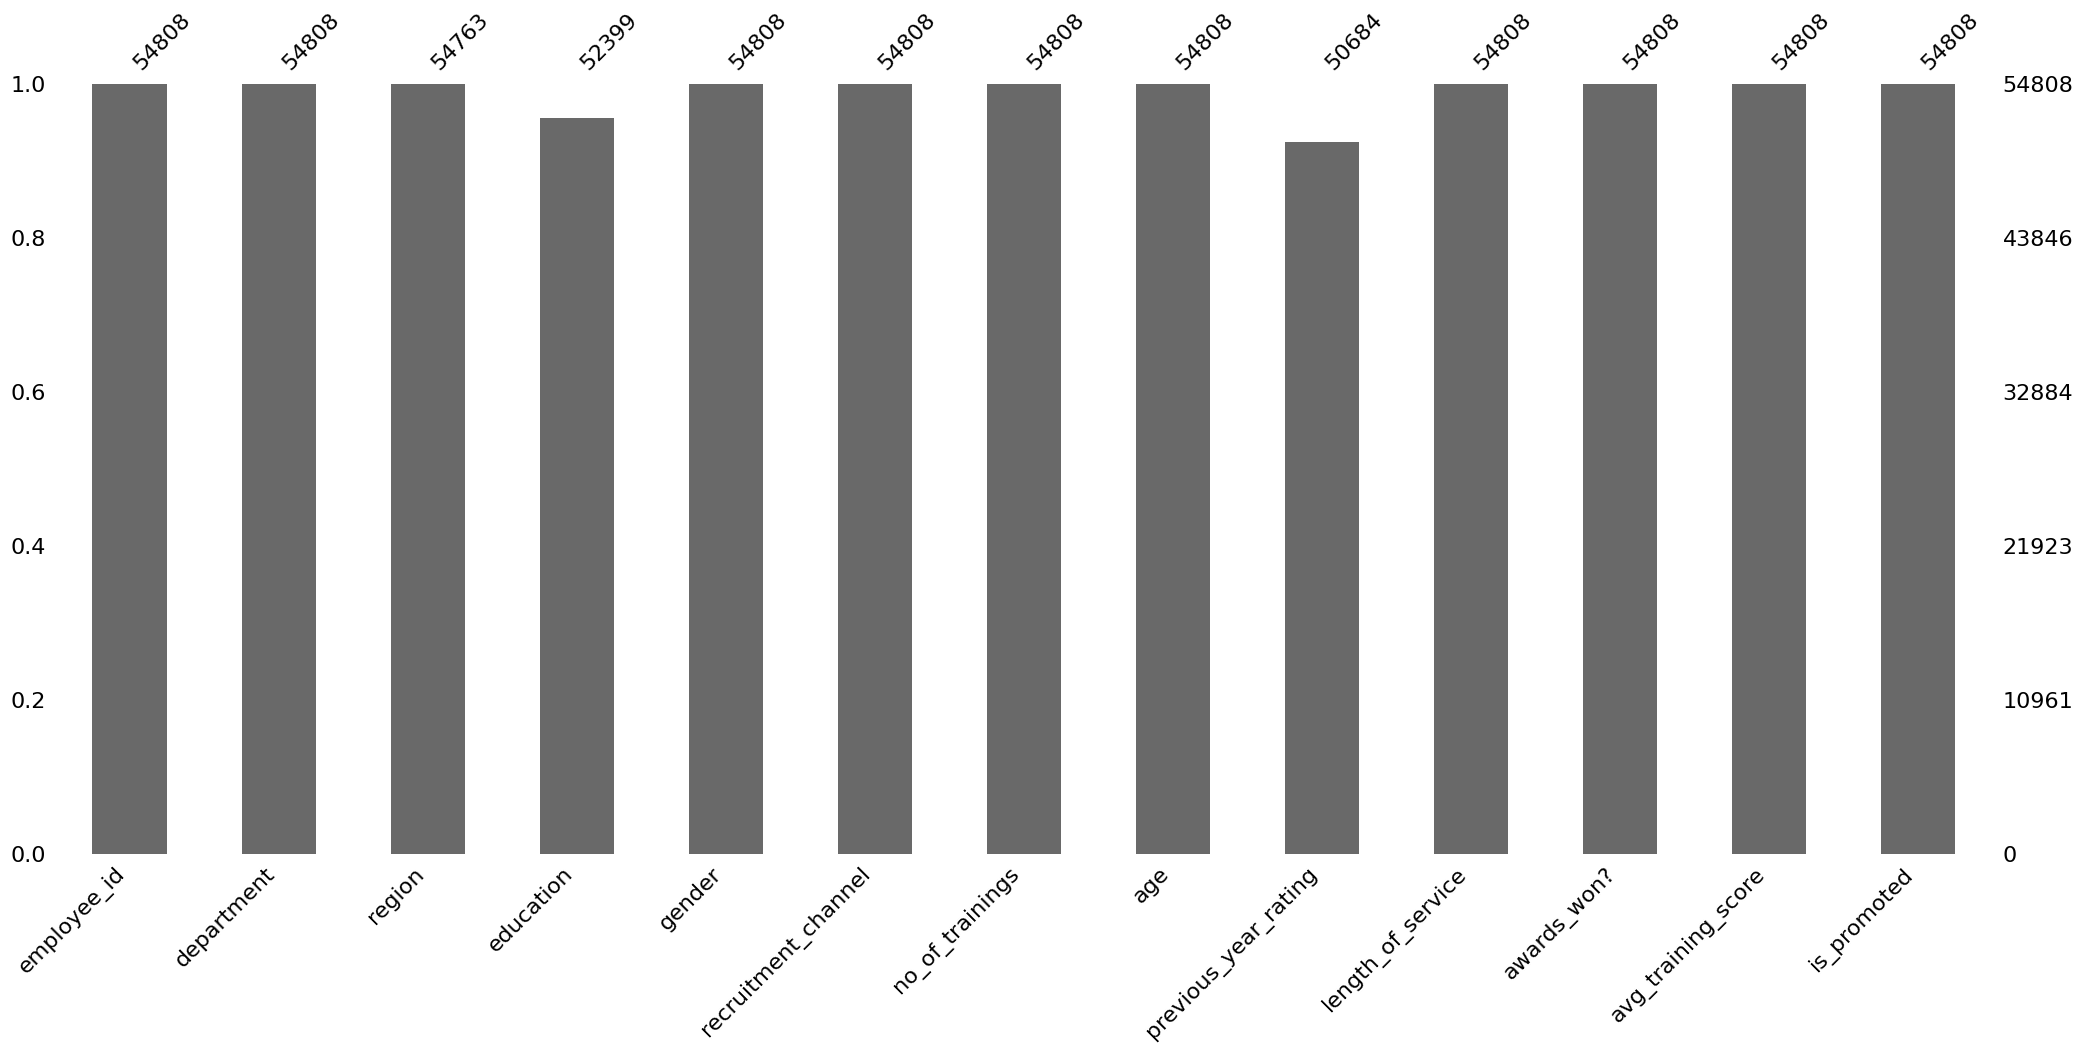

In [ ]:
import missingno as msno
msno.bar(df)

É possível observar que o percentual de valores ausentes parece ser relativamente abaixo e estes estão presentes em apenas três colunas: *region*, *education* e *previous_year_rating*.
<br>
Mas apenas com este gráfico não conseguimos saber, de fato, quantas linhas tem valor nulo. Para tanto, teremos que usar a função .isnull()

In [ ]:
#Identifica cada linha que tem valor nulo
linhas_com_nulos = df.isnull().sum(axis=1)
linhas_com_nulos

0        1
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    1
54807    0
Length: 54808, dtype: int64

In [ ]:
#Soma as linhas com valor nulo
total_linhas_com_pelo_menos_um_nulo = (linhas_com_nulos > 0).sum()
#Tira o percentual de nulos
percentual_linhas_valor_nulo = total_linhas_com_pelo_menos_um_nulo/len(df)

print("Total de linhas com pelo menos um valor nulo:", total_linhas_com_pelo_menos_um_nulo)
print("Percentual de linhas com pelo menos um valor nulo:", percentual_linhas_valor_nulo)

Total de linhas com pelo menos um valor nulo: 6191
Percentual de linhas com pelo menos um valor nulo: 0.11295796234126405


Os resultados mostram que cerca de 11% das linhas apresentam valor ausente (nulo). Nesse sentido, a técnica 1 não parece ser a mais adequada, uma vez que este percentual é significativo. Logo, usemos a técnica 2, selecionando um método de substituição para cada coluna com dados ausentes.

Comecemos pelo maior problema (a que tem mais dados ausentes): *previous_year_rating*. Uma possível explicação para esta ausência é que muitos profissionais podem ter sido contratados este ano e, portanto, não tem avaliação referente ao ano anterior.
<br>
<br>
Como o percentual da linhas com *previous_year_rating* ausente é de cerca de 8%, valor significativo, opta-se por usar a técnica 1! Sua aplicação é super simples, depende apenas da função .dropna():

In [ ]:
df = df.dropna(subset=['previous_year_rating'])

Em seguida, analisemos a coluna *region*. Como são poucos valores ausentes (menos de 1%), é razoável aproximar pela moda, como foi feito abaixo:

In [ ]:
moda_region = df['region'].mode()[0]
df['region'] = df['region'].fillna(moda_region)

<ipython-input-71-49321724acef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['region'].fillna(moda_region)


Por fim, a segunda coluna com mais dados ausentes é a de educação. Para ela, podemos ou eliminar os dados ausentes ou realizar uma substituição, preferencialmente uma técnica mais sofisticada, considerando a quantidade de *missing values*.
<br>
<br>
Nesse contexto, podemos fazer uma substituição com base na idade. É possível que a idade tenha a ver com o nível educacional, certo? Quanto maior o nível educacional, maior tende a ser a idade, dado que, para obter um mestrado, por exemplo, é necessário, antes, realizar o Ensino Médio e uma graduação em Ensino Superior, o que leva tempo.
<br>
<br>
Vamos verificar se essa hipótese é correta! Para tanto, vamos usar um boxplot, que mostra justamente a relação entre os valores de uma coluna quantitativa e uma coluna categórica.

<Figure size 800x600 with 0 Axes>

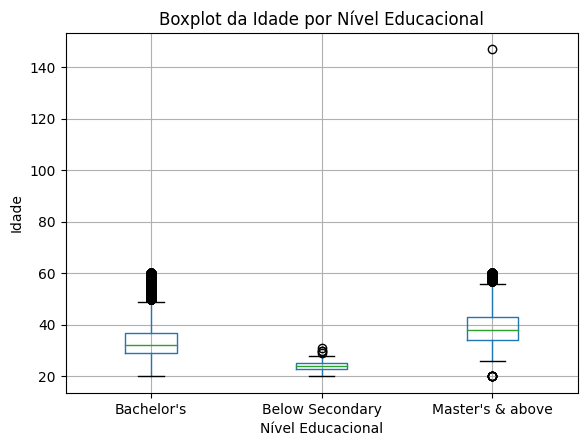

In [ ]:
# Criar um boxplot separado para cada nível educacional
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6)) #Definir tamanho do boxplot
df.boxplot(column='age', by='education') #Definir qual coluna categórica e qual coluna quantitativa serão usadas
plt.title("Boxplot da Idade por Nível Educacional") #Dar um título ao gráfico
plt.xlabel("Nível Educacional") #Título do eixo X
plt.ylabel("Idade") #Título do eixo Y
plt.suptitle("")  # Remover o título padrão do Pandas

# Mostrar o gráfico
plt.show()

Ignoremos por enquanto como foi feito esse boxplot, isso é tema para a próxima aula. O que nos interessa, de fato, é que nossa hipótese parece fazer sentido! Quanto mais velho maior tende a ser o nível educacional
<br>
<br>
Sendo assim, uma boa técnica de substituição é pegar a idade da pessoa e, a partir da mesma, montar uma regra de substituição:
- Para pessoas de até 30 anos, substituir o valor ausente na educação por *Below Secondary*
- Para pessoas de 31 a 37 anos, substituir o valor ausente na educação por *Bachelor's*
- Para pessoas acima de 37 anos, substituir o valor ausente na educação por *Master's & Above*


Para tanto, continuaremos a usaremos uma combinação de técnicas de programação: o pd.isna(*nome da coluna*), que verifica valores ausentes daquela coluna, e o .apply, que recebe uma função e aplica ela no conjunto de dados

In [ ]:
def substituir_educacao(row):
    idade = row['age'] #coleta todos os valores de idade
    educacao = row['education'] #coleta todos os valores de educação

    if pd.isna(educacao): #o uso do isna() é feito para olhar apenas para valores ausentes da coluna de educação
        if idade <= 30:
            return "Below Secondary"
        elif 31 <= idade <= 37:
            return "Bachelor's"
        else:
            return "Master's & above"
    else:
        return educacao

# Aplicar a função de substituição
df['education'] = df.apply(substituir_educacao, axis=1) #substitui os valores ausentes

#Limpando colunas com valor ausente
df = df.dropna()

Hora da verificação! Será que consertamos todos os valores ausentes?

<Axes: >

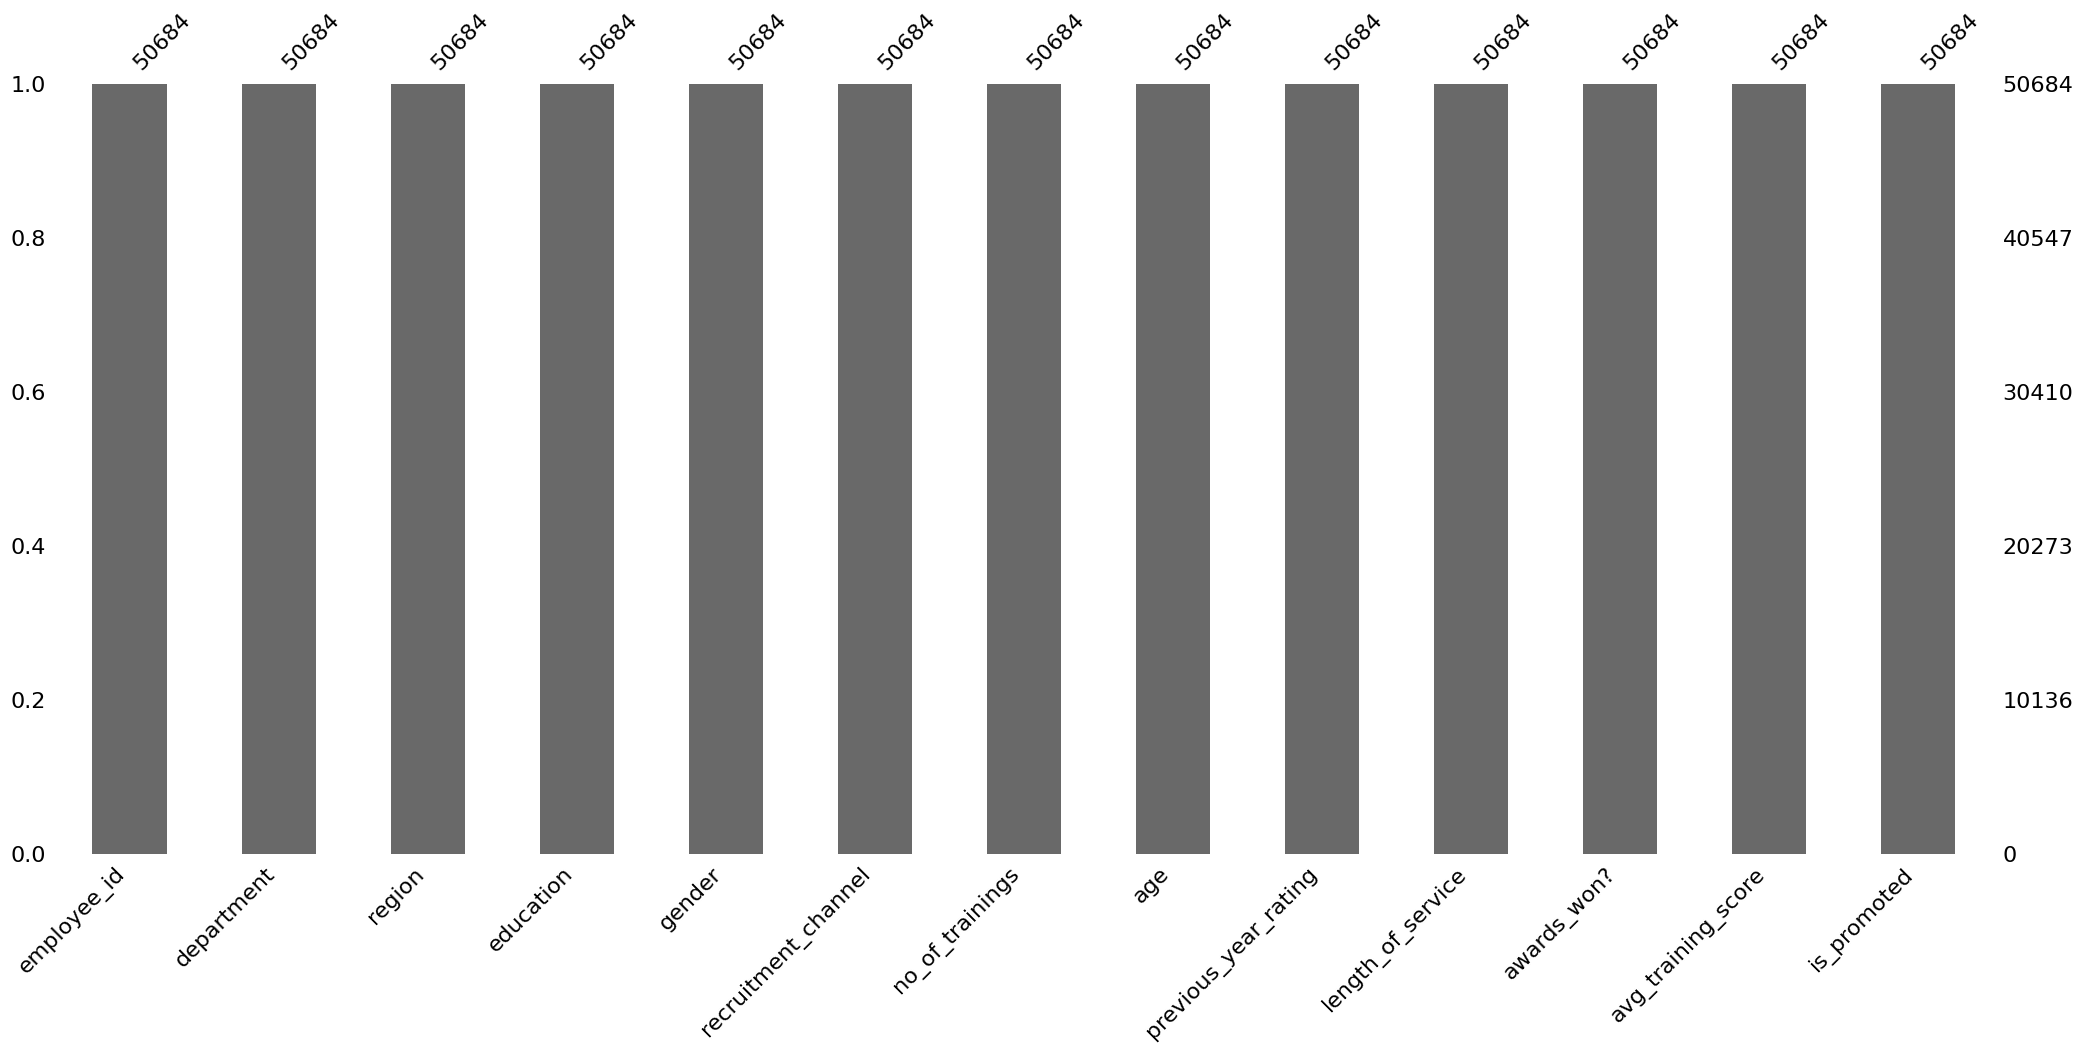

In [ ]:
msno.bar(df)

De fato, o problema foi solucionado!

## Lidando especificamente com os dados qualitativos (categóricos)

Na limpeza de dados, é sempre importante segmentar o problema - a abordagem de limpeza e tratamento de dados qualitativos é um pouco diversa daquela usada para dados quantitativos.
<br>
Além disso, cabe dizer que dados que devem ser quantitativos mas que por algum erro acabaram sendo classificados como *object* devem primeiro ser corrigidos junto dos dados de fato qualitativos e depois de corrigidos analisados junto dos quantitativos. A coluna *is_promoted*, por exemplo, é quantitativa, mas por causa de alguns erros de registro foi classificada como *object*
<br>
Conforme visto acima, temos 6 colunas classificadas como qualitativas - ou seja - colunas com variáveis cujos valores podem ser separados em diferentes categorias que se distinguem por alguma característica não numérica. São elas:
- department
- region
- education
- gender
- recruitment_channel
- is_promoted

Para limpar e tratar os dados categóricos, o primeiro passo é verificar quais são os valores únicos em cada uma dessas colunas: podemos encontrar erros de ortografia, por exemplo, ou dado completamente inconsistente (exemplo: educação - Carlos), como veremos abaixo:

In [ ]:
df["department"].value_counts()

Sales & Marketing    15529
Operations           10760
Procurement           6709
Technology            6592
Analytics             4886
Finance               2253
HR                    2172
R&D                    912
Legal                  871
Name: department, dtype: int64

In [ ]:
df["region"].value_counts()

region_2     11573
region_22     5680
region_7      4582
region_15     2687
region_13     2507
region_26     2043
region_31     1771
region_4      1624
region_27     1487
region_16     1354
region_28     1218
region_11     1209
region_23     1130
region_29      904
region_19      848
region_32      838
region_14      783
region_20      780
region_25      752
region_17      750
region_5       695
region_10      617
region_30      614
region_6       589
region_8       588
region_1       564
region_24      460
region_12      427
region_21      377
region_9       364
region_3       332
region_33      260
region_34      253
region_18       24
Name: region, dtype: int64

In [ ]:
df["education"].value_counts()

Bachelor's          33961
Master's & above    15194
Below Secondary      1529
Name: education, dtype: int64

In [ ]:
df["gender"].value_counts()

m    35529
f    15153
w        2
Name: gender, dtype: int64

In [ ]:
df["recruitment_channel"].value_counts()

other       28087
sourcing    21563
referred     1023
orther          6
sorcing         3
sourcin         1
refered         1
Name: recruitment_channel, dtype: int64

In [ ]:
df["is_promoted"].value_counts()

0      46347
1       4329
Yes        4
No         4
Name: is_promoted, dtype: int64

A partir da função .value_counts(), nota-se que *department*, *region* e *education* não aparentam ter problemas no que diz respeito aos valores apresentados. Todavia, as demais colunas são problemáticas:
- A coluna de gênero apresenta um "w", que provavelmente refere-se a *woman* (mulher em inglês), logo deveria estar classificado como "f" (referente ao gênero feminino);
- No *recruitment_channel*, temos uma série de erros de ortografia: orther no lugar de *other*, refered no lugar de *referred* e sourcing e sorcing no lugar de *sourcing*;
- A coluna *is_promoted* tem valor *Yes* ao invés de 1 (foi promovido) e valor *No* ao invés de 0 (não foi promovido)
<br>
<br>

Agora que já encontramos os primeiros erros, precisamos corrigi-los! Para substituir em uma coluna um valor por outro, usamos o **comando .replace()**

In [ ]:
df['gender'] = df['gender'].replace({'w': 'f'}).astype(object)
df['recruitment_channel'] = df['recruitment_channel'].replace({'orther': 'other', 'sorcing': 'sourcing', 'sourcin': 'sourcing',
                                                               'refered': 'referred'}).astype(object)
df['is_promoted'] = df['is_promoted'].replace({'Yes': 1, 'No': 0}).astype(int)

É sempre bom verificar se todos os erros foram corrigidos. Para tanto, olhemos para o value_counts() novamente!

In [ ]:
df["gender"].value_counts()

m    35529
f    15155
Name: gender, dtype: int64

In [ ]:
df["recruitment_channel"].value_counts()

other       28093
sourcing    21567
referred     1024
Name: recruitment_channel, dtype: int64

In [ ]:
df["is_promoted"].value_counts()

0    46351
1     4333
Name: is_promoted, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50684 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           50684 non-null  int64  
 1   department            50684 non-null  object 
 2   region                50684 non-null  object 
 3   education             50684 non-null  object 
 4   gender                50684 non-null  object 
 5   recruitment_channel   50684 non-null  object 
 6   no_of_trainings       50684 non-null  int64  
 7   age                   50684 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     50684 non-null  int64  
 10  awards_won?           50684 non-null  int64  
 11  avg_training_score    50684 non-null  int64  
 12  is_promoted           50684 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Repare que, além de termos resolvido o problema do erro ortográfico, automaticamente também consertamos o tipo de coluna no *is_promoted*, pois agora ela se apresenta como inteiro, o que de fato é, ao invés de *object*. Podemos, enfim, analisá-la como variável quantiativa na próxima seção!

## Lidando especificamente com dados quantitativos

Chegamos aos dados quantitativos! Para eles, os problemas aos quais devemos estar atentos são de valores impossíveis ou valores estranhos, muito acima ou abaixo do padrão, que chamamos de *outliers*.

Primeiramente, relembremos quais são os dados quantitativos com a função .describe()

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,50684.000000,50684.000000,50684.000000,50684.000000,50684.000000,50684.000000,50684.000000,50684.000000
mean,39182.829769,1.248875,35.451405,3.329256,6.261404,0.023163,63.389137,0.085490
std,22615.566687,0.605545,7.587039,1.259993,4.193831,0.150423,13.336133,0.279613
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19598.500000,1.000000,30.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39181.000000,1.000000,34.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58783.250000,1.000000,39.000000,4.000000,8.000000,0.000000,76.000000,0.000000
max,78298.000000,14.000000,147.000000,5.000000,37.000000,1.000000,99.000000,1.000000


É interessante reparar que nosso valor inconsistente de idade sumiu. Isso ocorreu pois a linha relativa à idade de 147 anos era uma das linhas que não tinha dado acerca da região. Logo, quando fizemos o df.dropna() a linha inteira desapareceu, logo este dado não se faz mais presente.
<br>
<br>
Uma rápida análise nos permite visualizar que não há nenhum dado impossível, mas alguns parecem altos demais, com destaque especial para *no_of_trainings*, que apresenta valor máximo de 14, muito acima de todos os demais parâmetros, e length_of_service de 37, também fora do padrão dos dados.
<br>
<br>
Uma boa forma de visualizar esses valores "estranhos" é com um gráfico de dispersão 1D ou com histograma. Vejamos abaixo!


<Axes: xlabel='no_of_trainings'>

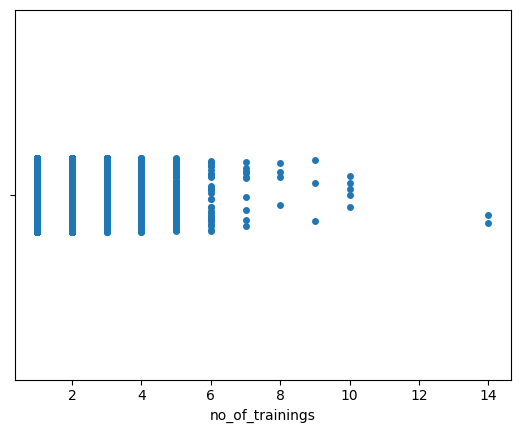

In [ ]:
#Gráfico 1D No_of_Trainings
import seaborn as sns #importando uma biblioteca para visualização de dados
sns.stripplot(data=df, x="no_of_trainings")

<Axes: xlabel='no_of_trainings', ylabel='Count'>

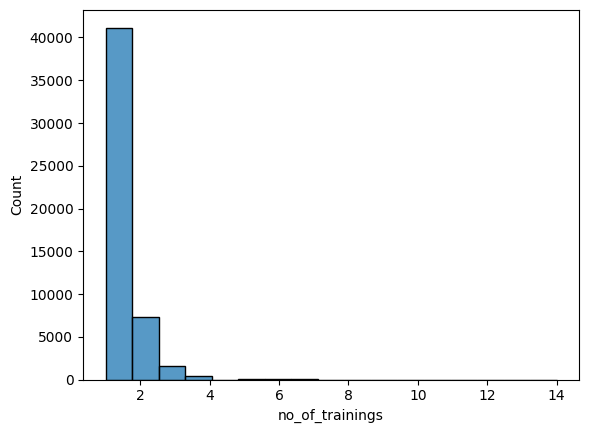

In [ ]:
#Histograma No_of_Trainings
sns.histplot(data=df, x='no_of_trainings')

<Axes: xlabel='length_of_service'>

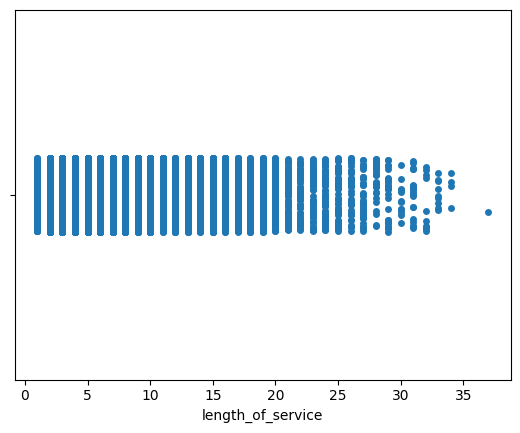

In [ ]:
#Gráfico 1D Length_of_Service
sns.stripplot(data=df, x='length_of_service')

<Axes: xlabel='length_of_service', ylabel='Count'>

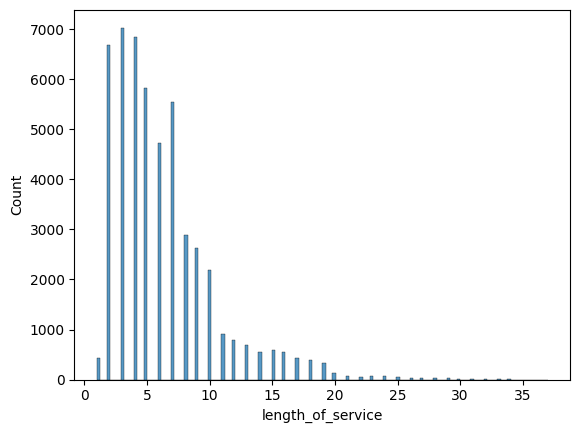

In [ ]:
sns.histplot(data=df,x='length_of_service')

Os gráficos mostram que, de fato, este número de treinamentos super elevado presente em 2 linhas do dataset parecem inconsistentes, outliers, enquanto o valor alto de tempo de serviço está dentro do esperado para a distribuição em questão.
<br>
<br>
É importante ressaltar que nem todo outlier é um erro ou algo necessariamente ruim. A depender da análise, inclusive, é necessário manter os outliers. Imagine que você tenha um dataset de faturamento dos produtos de uma empresa. Se um produto for responsável por 50% do faturamento, você irá eliminá-lo? Evidentemente não, pois a análise da empresa é extremamente associada à análise do seu carro-chefe de faturamento. É o que sempre reforçamos: as aulas fornecem caminhos, possíveis soluções para trabalhar com dados, mas cada *dataset* deve ter suas especificidades respeitadas!
<br>
<br>
Voltando ao nosso exemplo, parece fazer sentido eliminar estes outliers - como eles são muito maiores que os demais e não há nenhum motivo/causa aparente, é grande a chance de ter ocorrido um erro de digitação, por exemplo. Ainda, como são apenas 2 linhas, não teremos prejuízo na análise.
<br>
<br>
Para fazer essa eliminação, coloquemos a condição de que o número de treinos tenha que ser menor que 11:

In [ ]:
df = df[df.no_of_trainings < 11]

## Tratamento de Dados para Modelagem

Retomando um pouco da aula 1, o César comentou sobre a importância de transformar palavras em números, lembram? Basicamente, isso acontece porque, para construir algoritmos de modelagem e predição, o nosso sistema precisa receber informações numéricas!
<br>
<br>
Tá... mas o que fazer com as variáveis qualitativas?
<br>
<br>
Depende do tipo de variável!
- Nominal: não há uma ordem específica
- Ordinal: há uma ordem, uma hierarquia entre os valores
 <br>
 <br>
 Caso seja uma variável ordinal, isto é, quando existe uma ordem, uma progressão entre os valores categóricos da coluna (como é o caso de *education*, em que *Below Secondary* é o nível educacional mais baixo, *Bachelors* o intermediário e *Masters* o mais avançado), devemos atribuir 0 para o nível mais baixo, 1 para o segundo mais baixo e assim por diante, até chegarmos no nível mais avançado.
 <br>
 <br>
 Por fim, caso seja uma variável com múltiplas categorias e não ordinal o processo é bem mais trabalhoso, temos que usar uma técnica chamada one-hot encoding, que veremos mais a fundo na aula 4. Mas fazendo um resumão, a ideia é substituir a coluna específica por N colunas, sendo o N o número de valores únicos da coluna (por exemplo, a coluna *recruitment_channel* tem 3 valores possíveis, logo serão criadas 3 colunas, uma para cada valor possível - referred, sourcing ou other). Em seguida, para cada linha, será atribuido 1 para a coluna com o valor da linha e 0 para as colunas sem o valor dessa linha em específico.

In [ ]:
#Tratamento de variáveis ordinais
df['education'].replace({"Master's & above": 2, "Bachelor's": 1, 'Below Secondary': 0}, inplace=True)

<ipython-input-95-484af4b58235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'].replace({"Master's & above": 2, "Bachelor's": 1, 'Below Secondary': 0}, inplace=True)


In [ ]:
#Tratamento de variáveis nominais
df_encoded = pd.get_dummies(df, columns=['recruitment_channel','region','department','gender'])

Feitas estas transformações, temos nosso conjunto de dados pronto para modelagem.

In [ ]:
df_encoded.head(5)

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,recruitment_channel_other,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m
0,65438,2,1,147,5.0,8,0,49,1,0,...,0,0,0,0,0,0,1,0,1,0
1,65141,1,1,30,5.0,4,0,60,0,1,...,0,0,0,1,0,0,0,0,0,1
2,7513,1,1,34,3.0,7,0,50,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2542,1,2,39,1.0,10,0,50,0,1,...,0,0,0,0,0,0,1,0,0,1
4,48945,1,1,45,3.0,2,0,73,0,1,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
pd.Series(df.department.unique())

0    Sales & Marketing
1           Operations
2           Technology
3            Analytics
4                  R&D
5          Procurement
6              Finance
7                   HR
8                Legal
dtype: object